In [21]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [22]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [23]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [24]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [25]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [26]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [27]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [28]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [29]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [30]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [31]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [32]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [33]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:21,  5.47it/s]                         


Epoch 1 of 100
Generator loss: -0.23293215, Discriminator loss: 0.42847902


118it [00:15,  7.66it/s]                         


Epoch 2 of 100
Generator loss: -0.00002181, Discriminator loss: 0.00004056


118it [00:15,  7.75it/s]                         


Epoch 3 of 100
Generator loss: -0.00002268, Discriminator loss: 0.00003630


118it [00:15,  7.45it/s]                         


Epoch 4 of 100
Generator loss: -0.00002301, Discriminator loss: 0.00003392


118it [00:15,  7.76it/s]                         


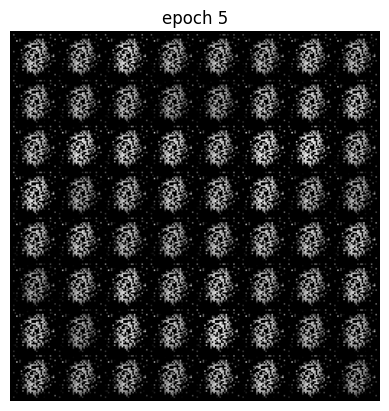

Epoch 5 of 100
Generator loss: -0.00002302, Discriminator loss: 0.00003411


118it [00:16,  7.07it/s]                         


Epoch 6 of 100
Generator loss: -0.00002579, Discriminator loss: 0.00003213


118it [00:15,  7.82it/s]                         


Epoch 7 of 100
Generator loss: -0.00002801, Discriminator loss: 0.00003674


118it [00:15,  7.73it/s]                         


Epoch 8 of 100
Generator loss: -0.00004684, Discriminator loss: 0.00005741


118it [00:15,  7.70it/s]                         


Epoch 9 of 100
Generator loss: -0.00040795, Discriminator loss: 0.00927734


118it [00:15,  7.77it/s]                         


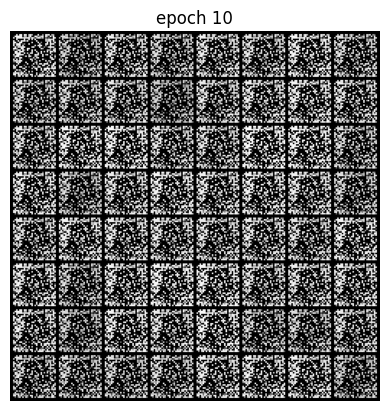

Epoch 10 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:14,  7.90it/s]                         


Epoch 11 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:14,  7.94it/s]                         


Epoch 12 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.82it/s]                         


Epoch 13 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:14,  7.88it/s]                         


Epoch 14 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:14,  7.91it/s]                         


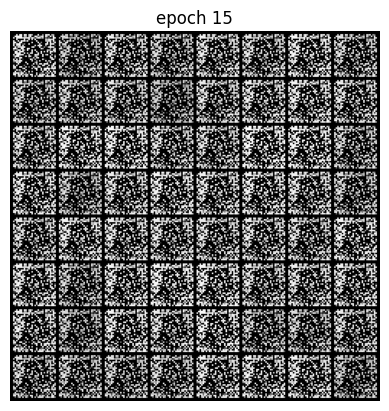

Epoch 15 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.67it/s]                         


Epoch 16 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.73it/s]                         


Epoch 17 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.60it/s]                         


Epoch 18 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.50it/s]                         


Epoch 19 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.47it/s]                         


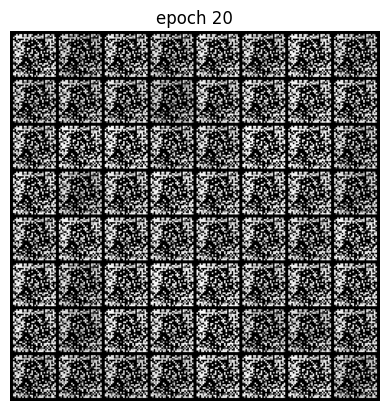

Epoch 20 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.59it/s]                         


Epoch 21 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.64it/s]                         


Epoch 22 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.42it/s]                         


Epoch 23 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.52it/s]                         


Epoch 24 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.57it/s]                         


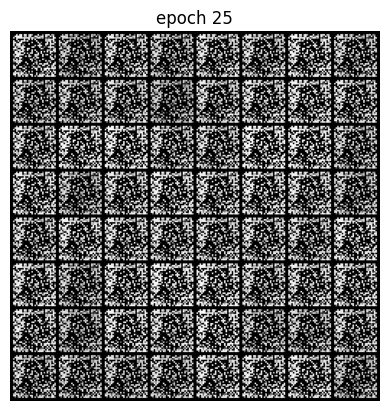

Epoch 25 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.48it/s]                         


Epoch 26 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.40it/s]                         


Epoch 27 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.25it/s]                         


Epoch 28 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.27it/s]                         


Epoch 29 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.42it/s]                         


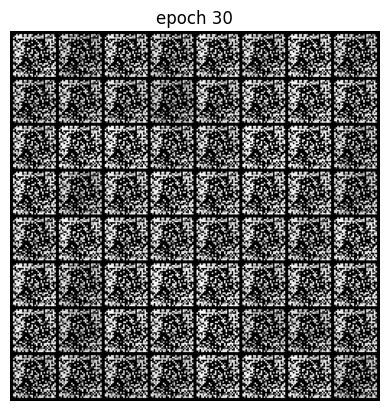

Epoch 30 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.31it/s]                         


Epoch 31 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.49it/s]                         


Epoch 32 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.40it/s]                         


Epoch 33 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.30it/s]                         


Epoch 34 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.33it/s]                         


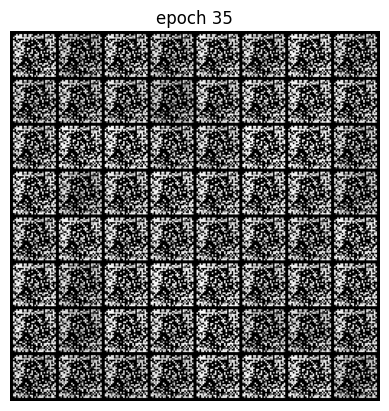

Epoch 35 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.10it/s]                         


Epoch 36 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.14it/s]                         


Epoch 37 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.31it/s]                         


Epoch 38 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.18it/s]                         


Epoch 39 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.25it/s]                         


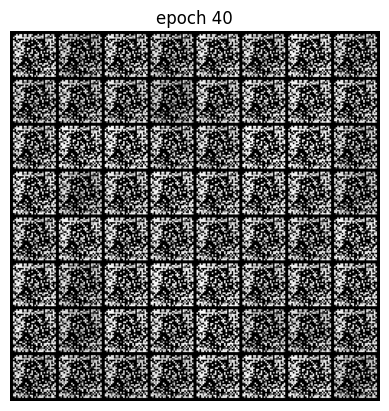

Epoch 40 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.16it/s]                         


Epoch 41 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.25it/s]                         


Epoch 42 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.18it/s]                         


Epoch 43 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.02it/s]                         


Epoch 44 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  6.97it/s]                         


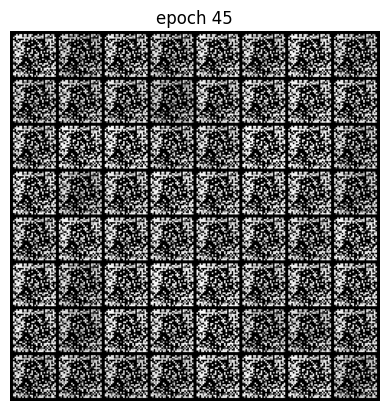

Epoch 45 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.05it/s]                         


Epoch 46 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.26it/s]                         


Epoch 47 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.05it/s]                         


Epoch 48 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.20it/s]                         


Epoch 49 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.06it/s]                         


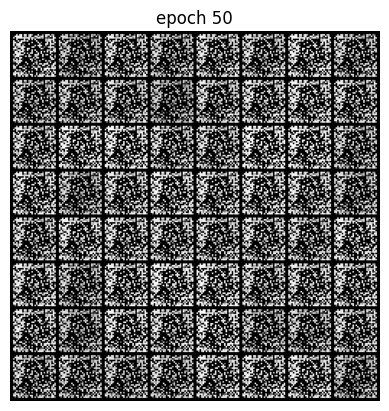

Epoch 50 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  6.97it/s]                         


Epoch 51 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.74it/s]                         


Epoch 52 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.89it/s]                         


Epoch 53 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.71it/s]                         


Epoch 54 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.90it/s]                         


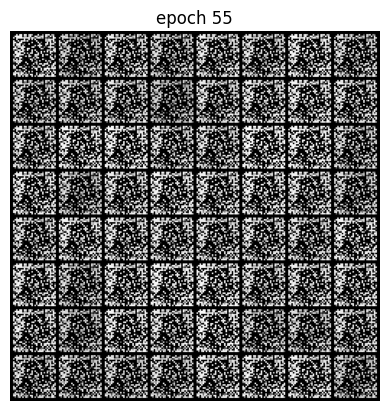

Epoch 55 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.84it/s]                         


Epoch 56 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.90it/s]                         


Epoch 57 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.86it/s]                         


Epoch 58 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.90it/s]                         


Epoch 59 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.86it/s]                         


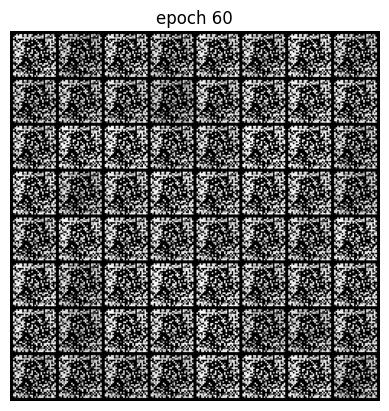

Epoch 60 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:18,  6.55it/s]                         


Epoch 61 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.59it/s]                         


Epoch 62 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  7.03it/s]                         


Epoch 63 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  6.96it/s]                         


Epoch 64 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:16,  6.96it/s]                         


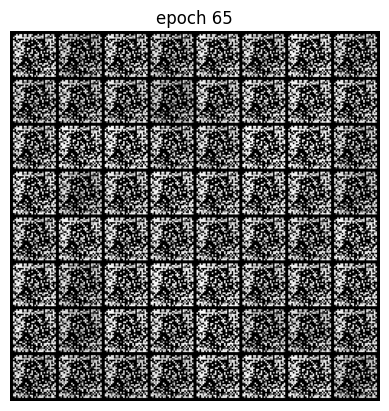

Epoch 65 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.85it/s]                         


Epoch 66 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.88it/s]                         


Epoch 67 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.84it/s]                         


Epoch 68 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.61it/s]                         


Epoch 69 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.77it/s]                         


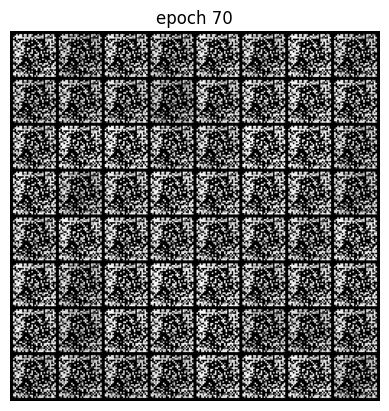

Epoch 70 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.60it/s]                         


Epoch 71 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.70it/s]                         


Epoch 72 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.76it/s]                         


Epoch 73 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.82it/s]                         


Epoch 74 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.66it/s]                         


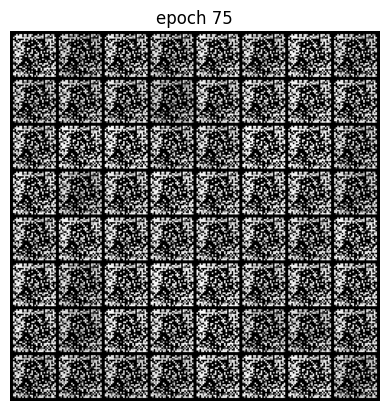

Epoch 75 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.57it/s]                         


Epoch 76 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.75it/s]                         


Epoch 77 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:18,  6.51it/s]                         


Epoch 78 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:18,  6.49it/s]                         


Epoch 79 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:18,  6.48it/s]                         


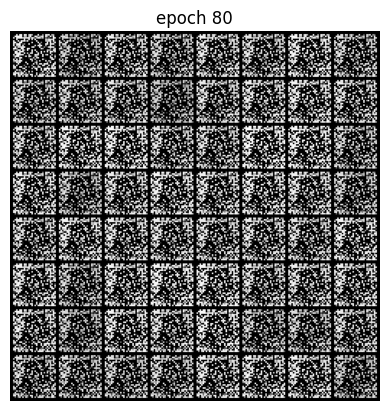

Epoch 80 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:18,  6.53it/s]                         


Epoch 81 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.69it/s]                         


Epoch 82 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.57it/s]                         


Epoch 83 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:18,  6.51it/s]                         


Epoch 84 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.57it/s]                         


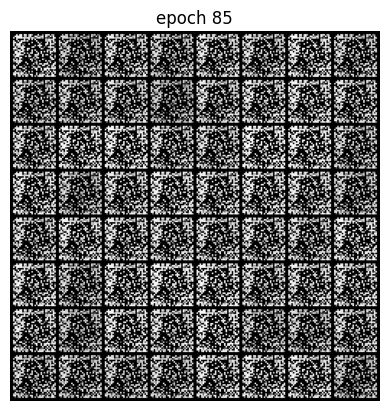

Epoch 85 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:17,  6.61it/s]                         


Epoch 86 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:18,  6.51it/s]                         


Epoch 87 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:18,  6.37it/s]                         


Epoch 88 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:18,  6.43it/s]                         


Epoch 89 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:18,  6.30it/s]                         


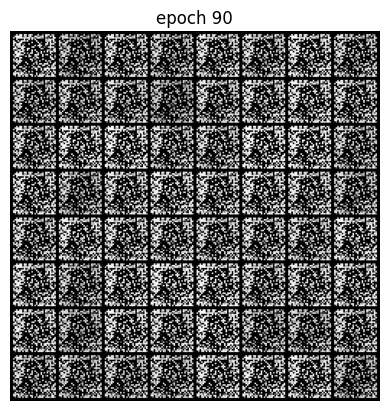

Epoch 90 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:18,  6.39it/s]                         


Epoch 91 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:18,  6.46it/s]                         


Epoch 92 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:18,  6.48it/s]                         


Epoch 93 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:18,  6.49it/s]                         


Epoch 94 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:18,  6.49it/s]                         


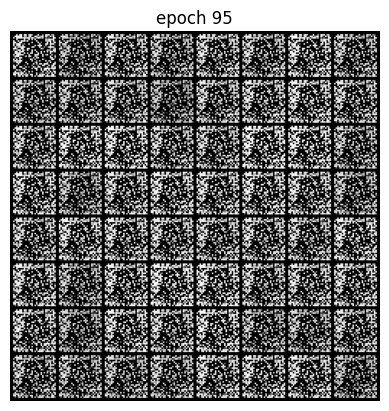

Epoch 95 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:18,  6.32it/s]                         


Epoch 96 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:18,  6.29it/s]                         


Epoch 97 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:18,  6.24it/s]                         


Epoch 98 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:18,  6.28it/s]                         


Epoch 99 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:18,  6.25it/s]                         


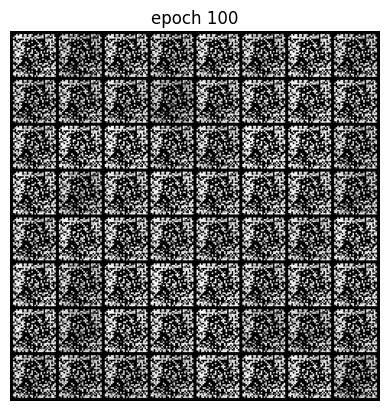

Epoch 100 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


In [34]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return -criterion(output,true_label)


    ######################################

def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    loss = criterion(output, true_label)
    return loss

    ######################################


for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
      ############ YOUR CODE HERE ##########

      ##Training Discriminator
      real_data, _ = data
      real_data = real_data.cuda()

      batch_size = real_data.shape[0]
      optim_d.zero_grad()
      ##Train on Real data
      predictions_real = discriminator(real_data).view(-1)

      target_real = label_real(predictions_real.shape[0]).squeeze(1)
      disc_loss_real = discriminator_loss(predictions_real, target_real)
      disc_loss_real.backward()

      rand_noise = create_noise(batch_size, nz)
      fake_images = generator(rand_noise)
      predictions_fake = discriminator(fake_images.detach()).view(-1)

      target_fake = label_fake(predictions_fake.shape[0]).squeeze(1)
      disc_loss_fake = discriminator_loss(predictions_fake, target_fake)
      disc_loss_fake.backward()
      optim_d.step()


      loss_d += disc_loss_real + disc_loss_fake

      ##Generator Training
      optim_g.zero_grad()
      rand_noise = create_noise(batch_size, nz)
      fake_images = generator(rand_noise)
      predictions_disc = discriminator(fake_images).view(-1)

      target_fake_generator = label_fake(predictions_disc.shape[0]).squeeze(1)
      loss_generator = generator_loss(predictions_disc, target_fake_generator)

      loss_generator.backward()

      loss_g += loss_generator

      optim_g.step()



        ######################################


    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()

    # make the images as grid
    generated_img = make_grid(generated_img)

    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()

    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)

    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [35]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [36]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

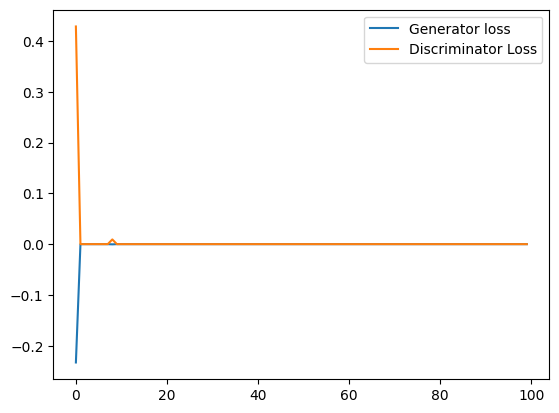

In [37]:
# # plot and save the generator and discriminator loss

numpy_list_d = [tensor.cpu().detach().numpy() for tensor in losses_d]
numpy_list_g = [tensor.cpu().detach().numpy() for tensor in losses_g]
plt.figure()
plt.plot(numpy_list_g, label='Generator loss')
plt.plot(numpy_list_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')

In [38]:
# # plot and save the generator and discriminator loss
# plt.figure()
# plt.plot(losses_g, label='Generator loss')
# plt.plot(losses_d, label='Discriminator Loss')
# plt.legend()
# plt.savefig('outputs/loss.png')

In [40]:
import shutil

# Define the path to the folder you want to zip
folder_path = '/content/outputs'  # Update this with your folder path

# Define the name for the zip file
zip_filename = '/content/outputs_new_2_1.zip'  # Update this with your desired zip file name

# Zip the folder
shutil.make_archive(zip_filename.split('.zip')[0], 'zip', folder_path)


'/content/outputs_new_2_1.zip'